In [1]:
# import libraries
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,6)})

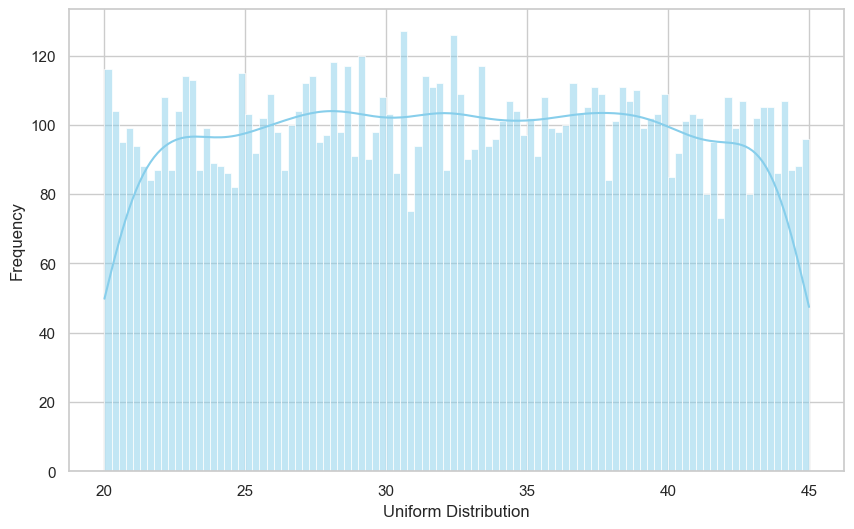

In [5]:
# Uniform Distribution
from scipy.stats import uniform

number = 10000
start = 20
width = 25

uniform_data = uniform.rvs(size=number, loc=start, scale=width)

sns.set(style="whitegrid")
sns.histplot(uniform_data, kde=True, color='skyblue', bins=100, alpha=0.5)
plt.xlabel('Uniform Distribution')
plt.ylabel('Frequency')

plt.show()
     

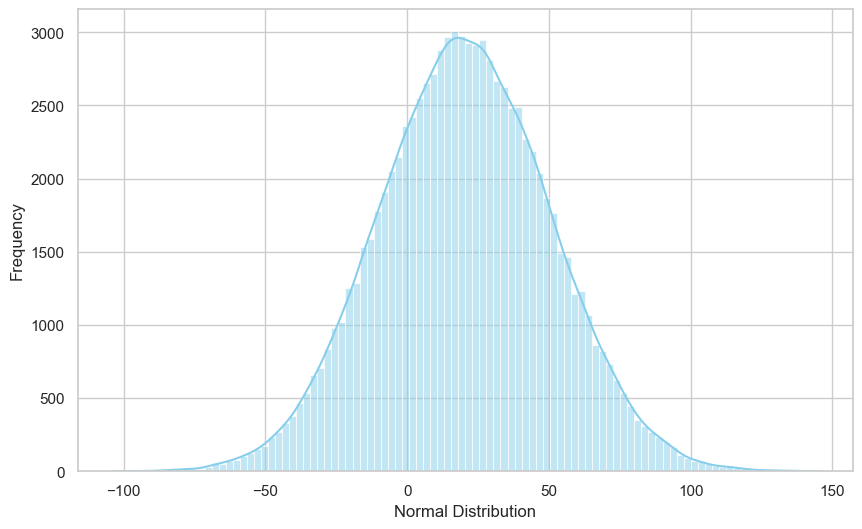

In [6]:
# Normal distribution
from scipy.stats import norm

normal_data = norm.rvs(size=90000, loc=20, scale=30)

sns.set(style="whitegrid")
sns.histplot(normal_data, kde=True, color='skyblue', bins=100, alpha=0.5)
plt.xlabel('Normal Distribution')
plt.ylabel('Frequency')

plt.show()

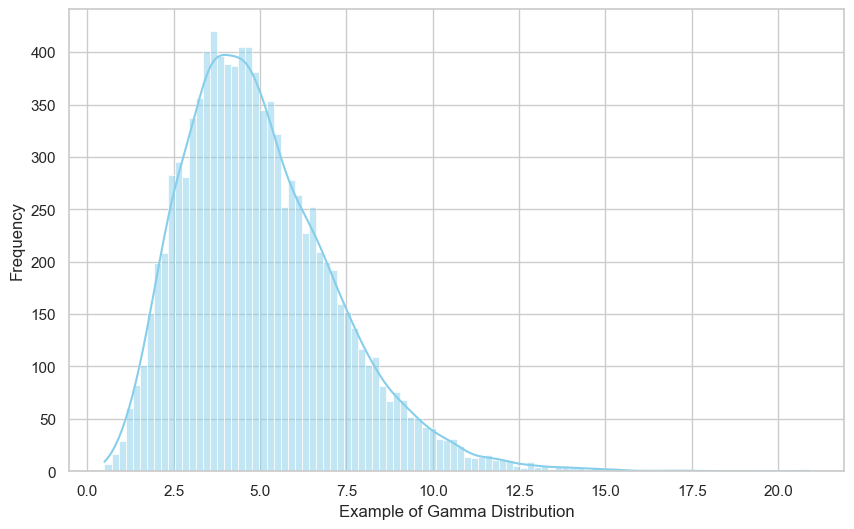

In [7]:
from scipy.stats import gamma

gamma_data = gamma.rvs(a=5, size=10000)

sns.set(style="whitegrid")
sns.histplot(gamma_data, kde=True, color='skyblue', bins=100, alpha=0.5)
plt.xlabel('Example of Gamma Distribution')
plt.ylabel('Frequency')

plt.show()

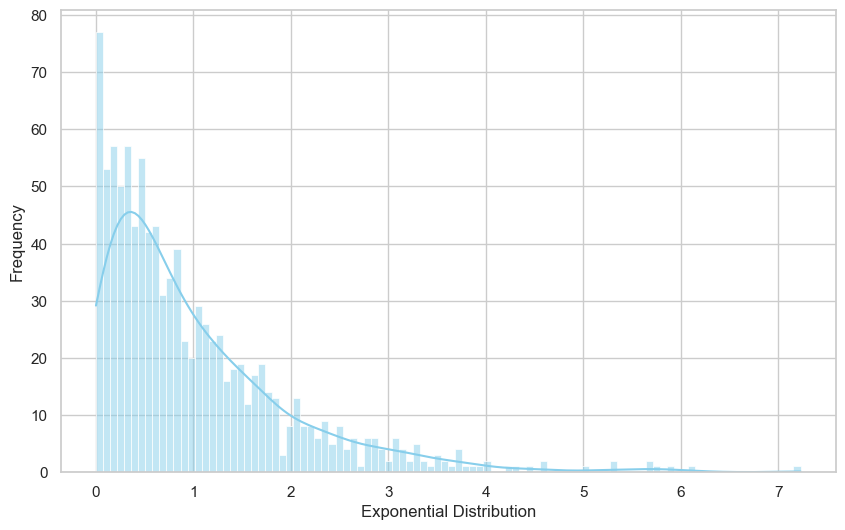

In [8]:
from scipy.stats import expon

expon_data = expon.rvs(scale=1, loc=0, size=1000)

sns.set(style="whitegrid")
sns.histplot(expon_data, kde=True, color='skyblue', bins=100, alpha=0.5)
plt.xlabel('Exponential Distribution')
plt.ylabel('Frequency')

plt.show()

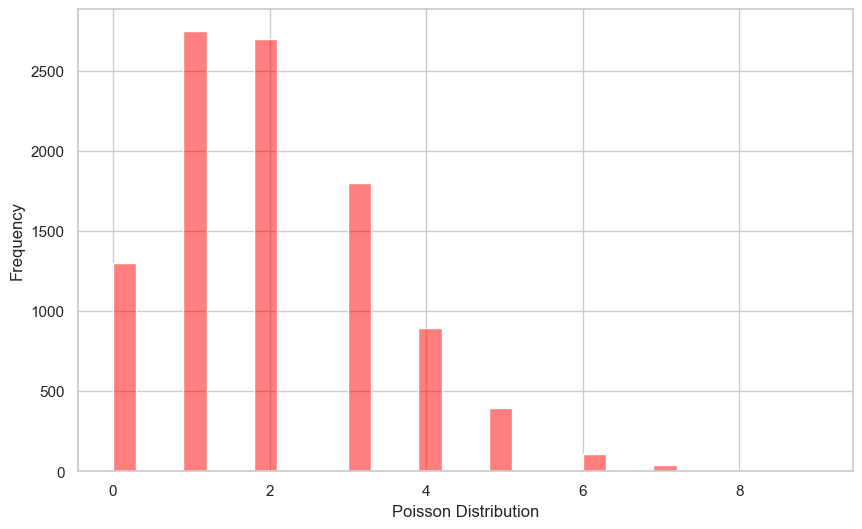

In [9]:
from scipy.stats import poisson

poisson_data = poisson.rvs(mu=2, size=10000)

sns.set(style="whitegrid")
sns.histplot(poisson_data, kde=False, color='red', bins=30, alpha=0.5)
plt.xlabel('Poisson Distribution')
plt.ylabel('Frequency')

plt.show()

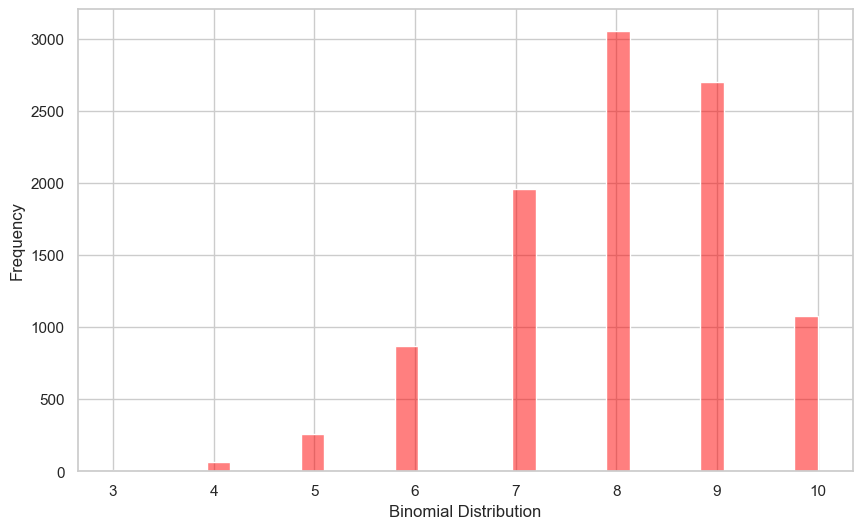

In [10]:
from scipy.stats import binom

binomial_data = binom.rvs(n=10, p=0.8, size=10000)

sns.set(style="whitegrid")
sns.histplot(binomial_data, kde=False, color='red', bins=30, alpha=0.5)
plt.xlabel('Binomial Distribution')
plt.ylabel('Frequency')

plt.show()

In [12]:
# loading data set as Pandas dataframe
df = pd.read_csv("Data/data.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [13]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

#Data Cleaning

In [14]:

# Find out the number of values which are not numeric
df['price'].str.isnumeric().value_counts()

# List out the values which are not numeric
df['price'].loc[df['price'].str.isnumeric() == False]

#Setting the missing value to mean of price and convert the datatype to integer
price = df['price'].loc[df['price'] != '?']
pmean = price.astype(str).astype(int).mean()
df['price'] = df['price'].replace('?',pmean).astype(int)
df['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

In [15]:

# Cleaning the horsepower losses field
df['horsepower'].str.isnumeric().value_counts()
horsepower = df['horsepower'].loc[df['horsepower'] != '?']
hpmean = horsepower.astype(str).astype(int).mean()
df['horsepower'] = df['horsepower'].replace('?',hpmean).astype(int)
df['horsepower'].head()

0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: int64

In [16]:

# cleaning the bore
# Find out the number of invalid value
df['bore'].loc[df['bore'] == '?']
# Replace the non-numeric value to null and convert the datatype
df['bore'] = pd.to_numeric(df['bore'],errors='coerce')
df.bore.head()

0    3.47
1    3.47
2    2.68
3    3.19
4    3.19
Name: bore, dtype: float64

In [17]:
# Cleaning the column stoke
df['stroke'] = pd.to_numeric(df['stroke'],errors='coerce')
df['stroke'].head()
     

0    2.68
1    2.68
2    3.47
3    3.40
4    3.40
Name: stroke, dtype: float64

In [18]:
# Cleaning the column peak-rpm 
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'],errors='coerce')
df['peak-rpm'].head()

0    5000.0
1    5000.0
2    5000.0
3    5500.0
4    5500.0
Name: peak-rpm, dtype: float64

In [19]:
# Cleaning the Column num-of-doors data
# remove the records which are having the value '?'
df['num-of-doors'].loc[df['num-of-doors'] == '?']
df= df[df['num-of-doors'] != '?']
df['num-of-doors'].loc[df['num-of-doors'] == '?']

Series([], Name: num-of-doors, dtype: object)

In [20]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000,199.000000,199.000000,203.000000,203.000000,201.000000,203.000000,203.000000,203.000000
mean,0.837438,98.781281,174.11330,65.915271,53.731527,2557.916256,127.073892,3.330955,3.254070,10.093202,104.463054,5125.870647,25.172414,30.699507,13241.911330
std,1.250021,6.040994,12.33909,2.150274,2.442526,522.557049,41.797123,0.274054,0.318023,3.888216,39.612384,479.820136,6.529812,6.874645,7898.957924
min,-2.000000,86.600000,141.10000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.55000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7781.500000
50%,1.000000,97.000000,173.20000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,102.400000,183.30000,66.900000,55.500000,2943.500000,143.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.10000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Let's start by computing Measure of central tendency

In [21]:
# get column height from df
height =df["height"]
print(height)

0      48.8
1      48.8
2      52.4
3      54.3
4      54.3
       ... 
200    55.5
201    55.5
202    55.5
203    55.5
204    55.5
Name: height, Length: 203, dtype: float64


In [22]:
#calculate mean, median and mode of dat set height
mean = height.mean()
median =height.median()
mode = height.mode()
print(mean , median, mode)

53.73152709359609 54.1 0    50.8
Name: height, dtype: float64


For categorical variables which has discrite values we can summarize the categorical data is by using the function value_counts().

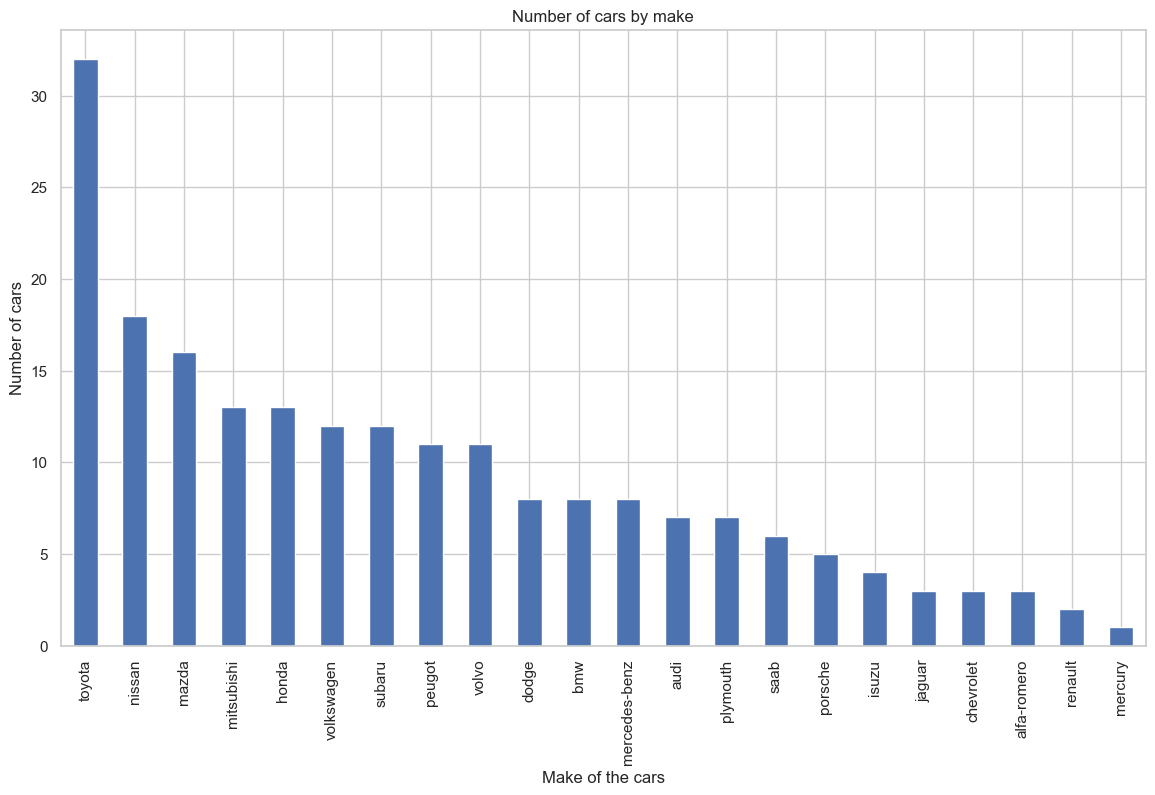

In [23]:
import matplotlib.pyplot as plt

df.make.value_counts().nlargest(30).plot(kind='bar', figsize=(14,8))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make of the cars');

In [24]:
#summarize categories of drive-wheels
drive_wheels_count =df["drive-wheels"].value_counts()
print(drive_wheels_count)

fwd    118
rwd     76
4wd      9
Name: drive-wheels, dtype: int64


# Measures of Dispersion

In [26]:
# Standard deviation of the entire dataset
std_dev = df.std()
print(std_dev)

# Standard deviation of the specific column 'height'
sv_height = df['height'].std()
print(sv_height)

symboling               1.250021
wheel-base              6.040994
length                 12.339090
width                   2.150274
height                  2.442526
curb-weight           522.557049
engine-size            41.797123
bore                    0.274054
stroke                  0.318023
compression-ratio       3.888216
horsepower             39.612384
peak-rpm              479.820136
city-mpg                6.529812
highway-mpg             6.874645
price                7898.957924
dtype: float64
2.442525704031867


/var/folders/h3/cyrs85856qq55m7y7mmnbp7w0000gn/T/ipykernel_15565/2395827134.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_dev = df.std()


# Measure of variance

In [27]:
# variance of data set using var() function
variance=df.var()
print(variance)
# variance of the specific column
var_height=df.loc[:,"height"].var()
print(var_height)

symboling            1.562552e+00
wheel-base           3.649361e+01
length               1.522531e+02
width                4.623677e+00
height               5.965932e+00
curb-weight          2.730659e+05
engine-size          1.746999e+03
bore                 7.510565e-02
stroke               1.011384e-01
compression-ratio    1.511822e+01
horsepower           1.569141e+03
peak-rpm             2.302274e+05
city-mpg             4.263844e+01
highway-mpg          4.726074e+01
price                6.239354e+07
dtype: float64
5.965931814856368


/var/folders/h3/cyrs85856qq55m7y7mmnbp7w0000gn/T/ipykernel_15565/2631614675.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variance=df.var()


In [28]:
df.loc[:,"height"].var()

5.965931814856368

In [29]:
df.skew()

/var/folders/h3/cyrs85856qq55m7y7mmnbp7w0000gn/T/ipykernel_15565/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


symboling            0.204275
wheel-base           1.041170
length               0.154086
width                0.900685
height               0.064134
curb-weight          0.668942
engine-size          1.934993
bore                 0.013419
stroke              -0.669515
compression-ratio    2.682640
horsepower           1.391224
peak-rpm             0.073094
city-mpg             0.673533
highway-mpg          0.549104
price                1.812335
dtype: float64

In [30]:
# skewness of the specific column
df.loc[:,"height"].skew()


0.06413448813322854

# Kurtosis 

In [31]:
# Kurtosis of data in data using skew() function
kurtosis =df.kurt()
print(kurtosis)

# Kurtosis of the specific column
sk_height=df.loc[:,"height"].kurt()
print(sk_height)

symboling           -0.691709
wheel-base           0.986065
length              -0.075680
width                0.687375
height              -0.429298
curb-weight         -0.069648
engine-size          5.233661
bore                -0.830965
stroke               2.030592
compression-ratio    5.643878
horsepower           2.646625
peak-rpm             0.068155
city-mpg             0.624470
highway-mpg          0.479323
price                3.287412
dtype: float64
-0.4292976016374439


/var/folders/h3/cyrs85856qq55m7y7mmnbp7w0000gn/T/ipykernel_15565/2456526011.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kurtosis =df.kurt()


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.rcParams['figure.figsize'] = (10, 6)

Text(0, 0.5, 'price')

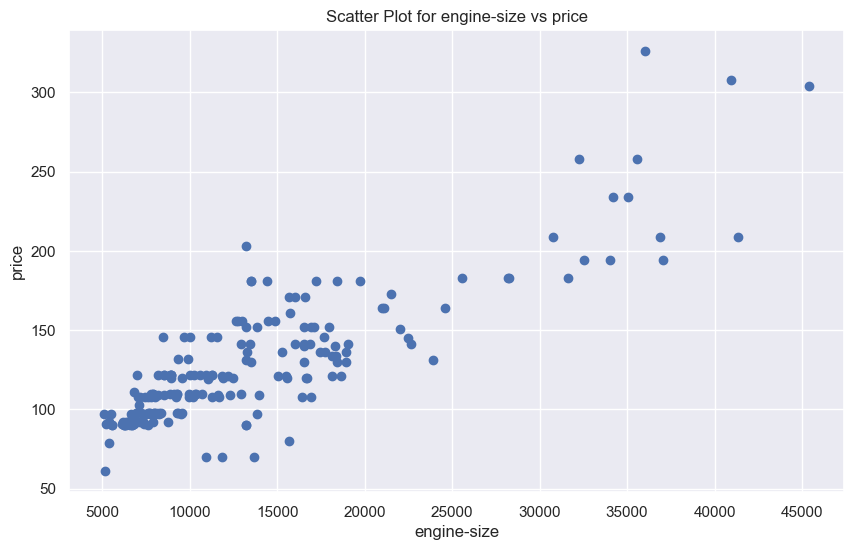

In [33]:
# plot the relationship between “engine-size” and ”price”
plt.scatter(df["price"], df["engine-size"])
plt.title("Scatter Plot for engine-size vs price")
plt.xlabel("engine-size")
plt.ylabel("price")
     

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

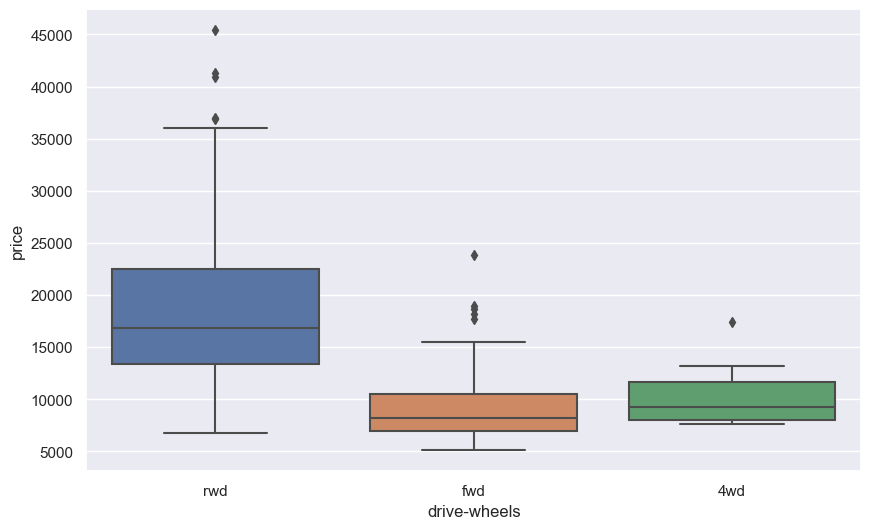

In [34]:

#boxplot to visualize the distribution of "price" with types of "drive-wheels"
sns.boxplot(x="drive-wheels", y="price",data=df)


# Calculating percentiles

In [35]:
# calculating 30th percentile of heights in dataset
height = df["height"]
percentile = np.percentile(height, 50,)
print(percentile)

54.1


Quartiles

It divides the data set into four equal points.

First quartile = 25th percentile Second quartile = 50th percentile (Median) Third quartile = 75th percentile

Based on the quartile, there is a another measure called inter-quartile range that also measures the variability in the dataset. It is defined as:

IQR = Q3 - Q1

IQR is not affected by the presence of outliers.

In [36]:
price = df.price.sort_values()
Q1 = np.percentile(price, 25)
Q2 = np.percentile(price, 50)
Q3 = np.percentile(price, 75)

IQR = Q3 - Q1
IQR

8718.5